## **Data Exploratory Step:**

### **Univariate Analysis:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import adjustText as ajt
import ast

In [2]:
df = pd.read_csv("D:\\IT Courses\\Data Analysis Courses\\Data Club Courses\\Supermarket Sales Analysis Project\\Supermarkets_Sales Analysis_Project\\Data\\cleaned_supermarket_sales.csv")

In [3]:
df["date_time"] = pd.to_datetime(df["date_time"])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   invoice_id               1000 non-null   object        
 1   branch                   1000 non-null   object        
 2   city                     1000 non-null   object        
 3   customer_type            1000 non-null   object        
 4   gender                   1000 non-null   object        
 5   product_line             1000 non-null   object        
 6   unit_price               1000 non-null   float64       
 7   quantity                 1000 non-null   int64         
 8   tax_5%                   1000 non-null   float64       
 9   total                    1000 non-null   float64       
 10  date_time                1000 non-null   datetime64[ns]
 11  payment                  1000 non-null   object        
 12  cogs                     1000 non-null  

### **Univariate Analysis Of Numerical (Quantitative) Columns**

### **Frequency Of Numerical Columns Using (Histogram):**

In [4]:
numerical_columns = df.select_dtypes('number')
numerical_columns.columns.nunique()

8

In [5]:
numerical_columns.head()

,unit_price,quantity,tax_5%,total,cogs,gross_margin_percentage,gross_income,rating
0,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415,9.1
1,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200,9.6
2,46.33,7,16.2155,340.5255,324.31,4.761905,16.2155,7.4
3,58.22,8,23.2880,489.0480,465.76,4.761905,23.2880,8.4
4,86.31,7,30.2085,634.3785,604.17,4.761905,30.2085,5.3


### **Using Matplotlib Library:**

**First Way:**

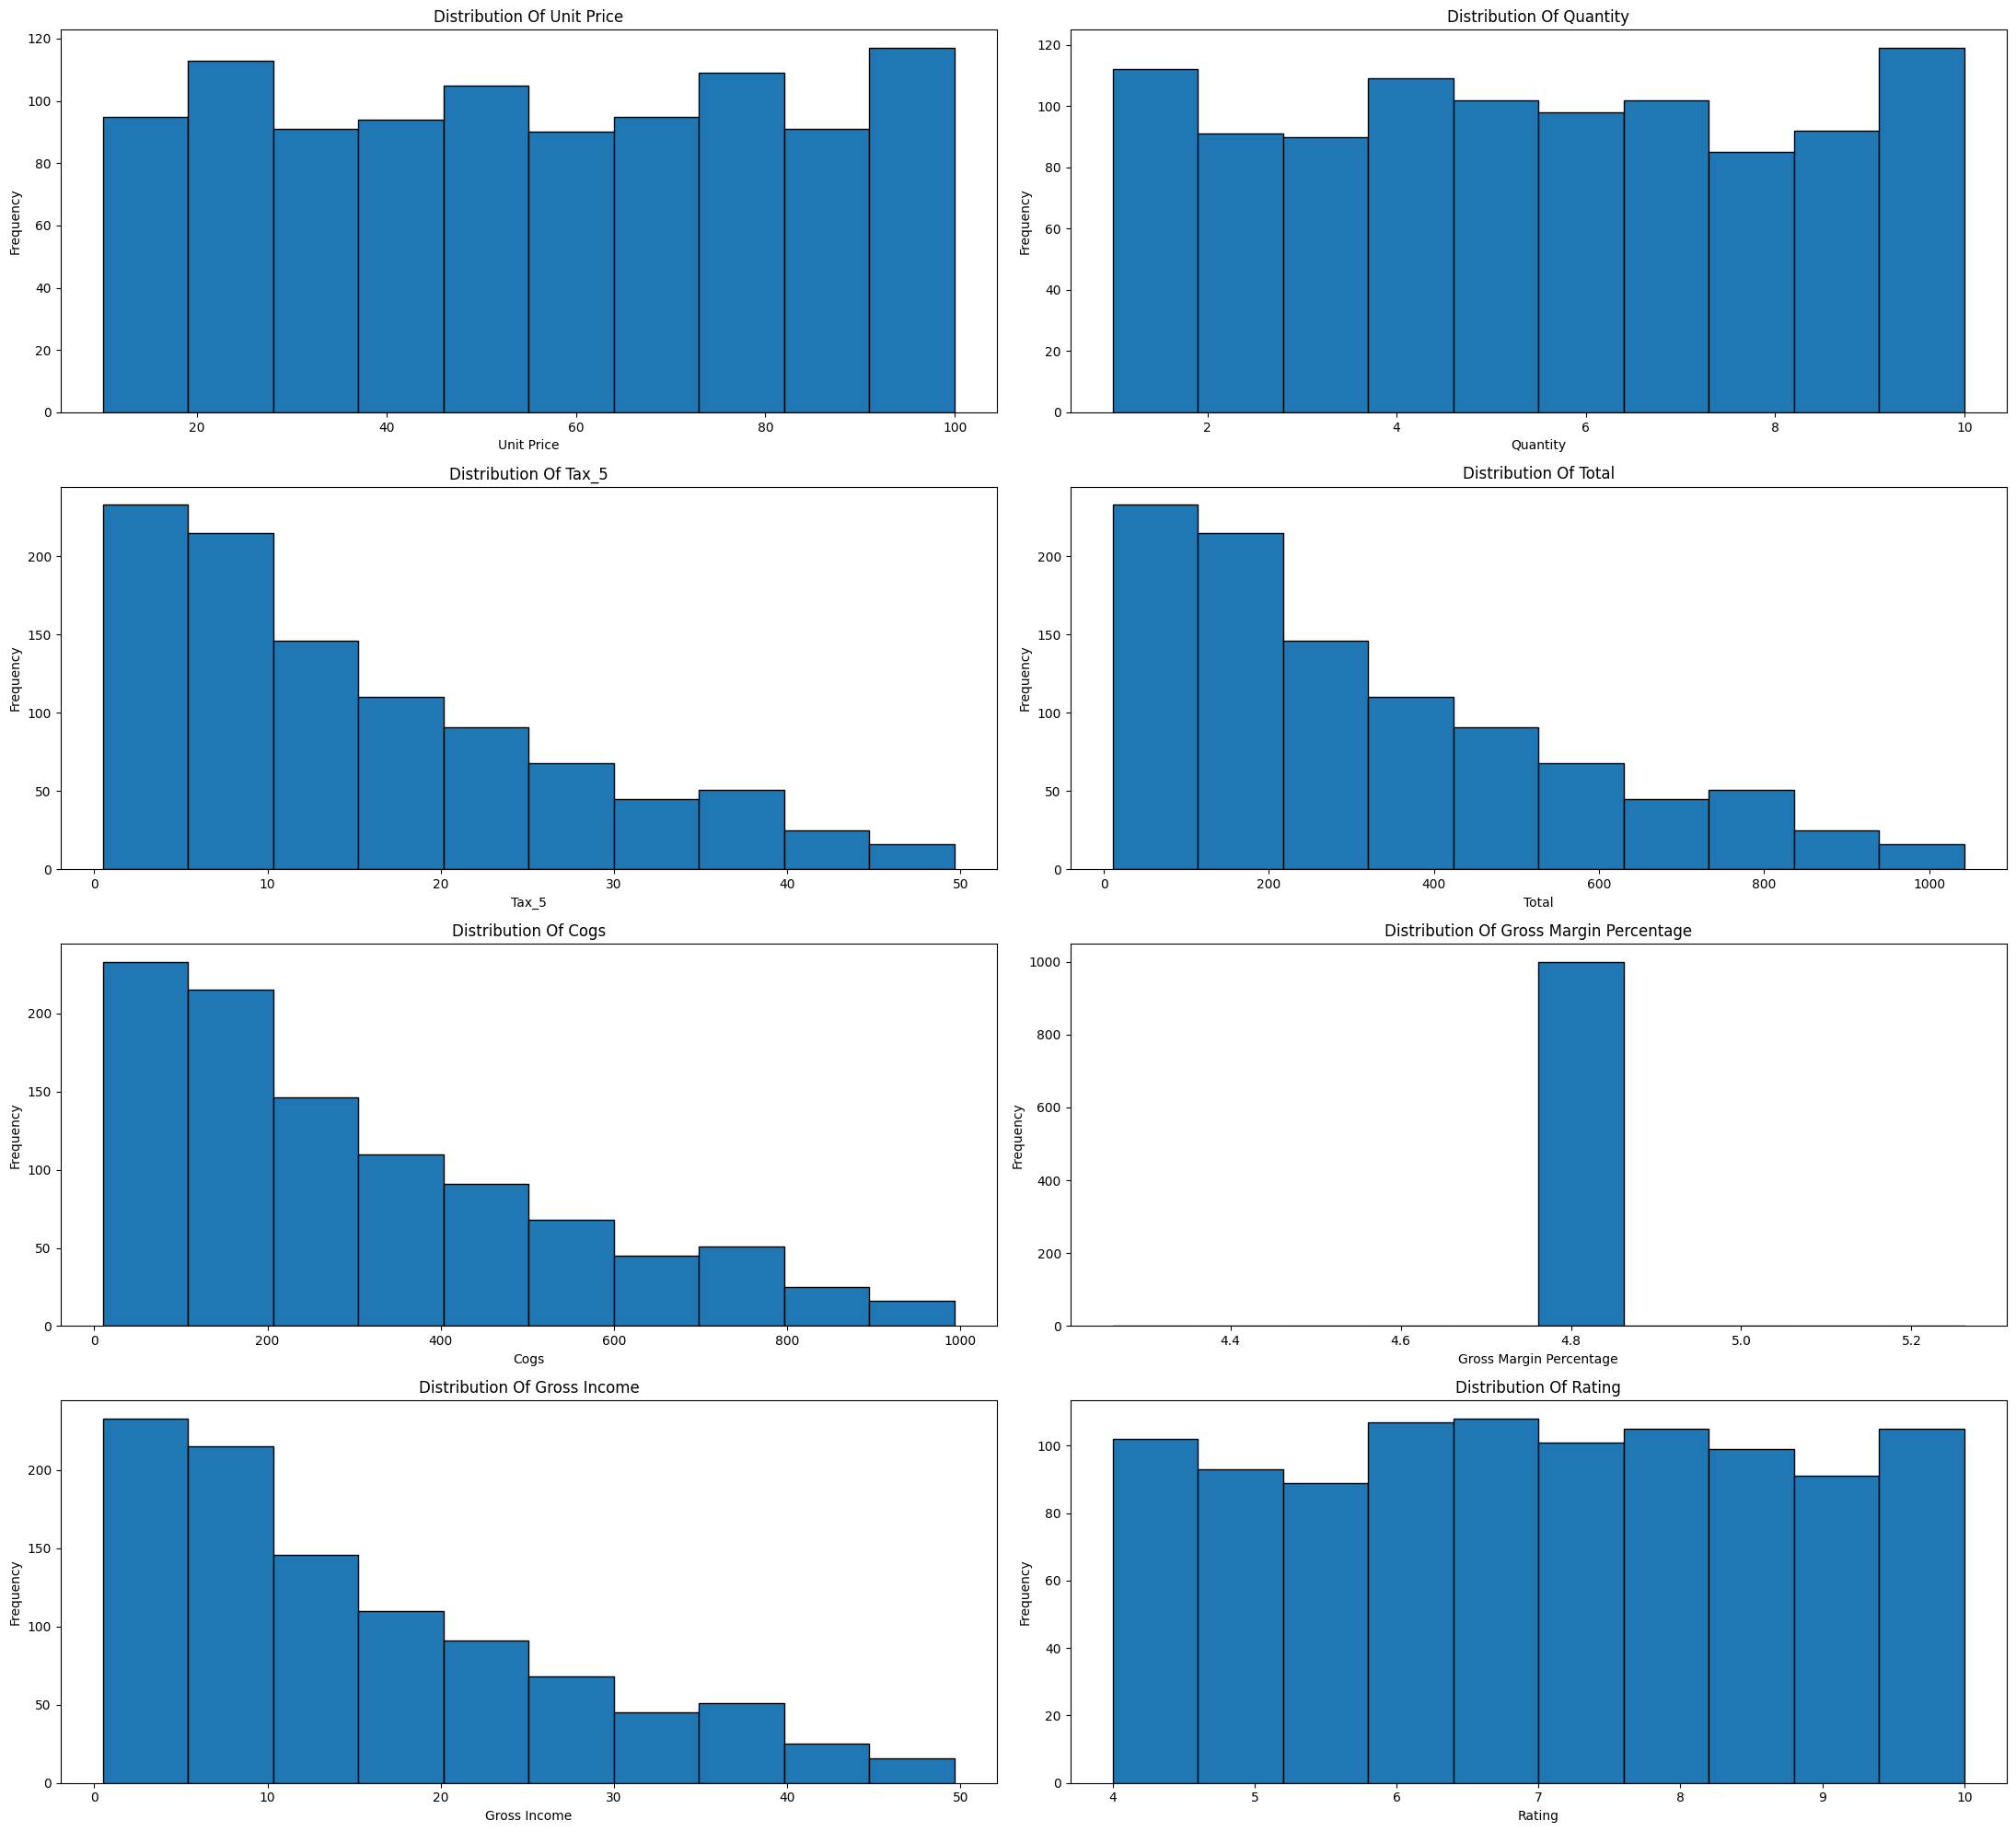

In [6]:
fig, ax = plt.subplots(4,2, figsize=(22,20))

ax[0,0].hist(data=numerical_columns, x="unit_price", edgecolor='black')
ax[0,1].hist(data=numerical_columns, x="quantity", edgecolor='black')
ax[1,0].hist(data=numerical_columns, x="tax_5%", edgecolor='black')
ax[1,1].hist(data=numerical_columns, x="total", edgecolor='black')
ax[2,0].hist(data=numerical_columns, x="cogs", edgecolor='black')
ax[2,1].hist(data=numerical_columns, x="gross_margin_percentage", edgecolor='black')
ax[3,0].hist(data=numerical_columns, x="gross_income", edgecolor='black')
ax[3,1].hist(data=numerical_columns, x="rating", edgecolor='black')

ax[0,0].set_title("Distribution Of Unit Price")
ax[0,1].set_title("Distribution Of Quantity")
ax[1,0].set_title("Distribution Of Tax_5")
ax[1,1].set_title("Distribution Of Total")
ax[2,0].set_title("Distribution Of Cogs")
ax[2,1].set_title("Distribution Of Gross Margin Percentage")
ax[3,0].set_title("Distribution Of Gross Income")
ax[3,1].set_title("Distribution Of Rating")

ax[0,0].set_ylabel("Frequency")
ax[0,1].set_ylabel("Frequency")
ax[1,0].set_ylabel("Frequency")
ax[1,1].set_ylabel("Frequency")
ax[2,0].set_ylabel("Frequency")
ax[2,1].set_ylabel("Frequency")
ax[3,0].set_ylabel("Frequency")
ax[3,1].set_ylabel("Frequency")

ax[0,0].set_xlabel("Unit Price")
ax[0,1].set_xlabel("Quantity")
ax[1,0].set_xlabel("Tax_5")
ax[1,1].set_xlabel("Total")
ax[2,0].set_xlabel("Cogs")
ax[2,1].set_xlabel("Gross Margin Percentage")
ax[3,0].set_xlabel("Gross Income")
ax[3,1].set_xlabel("Rating")

plt.tight_layout()

**Second Way:**

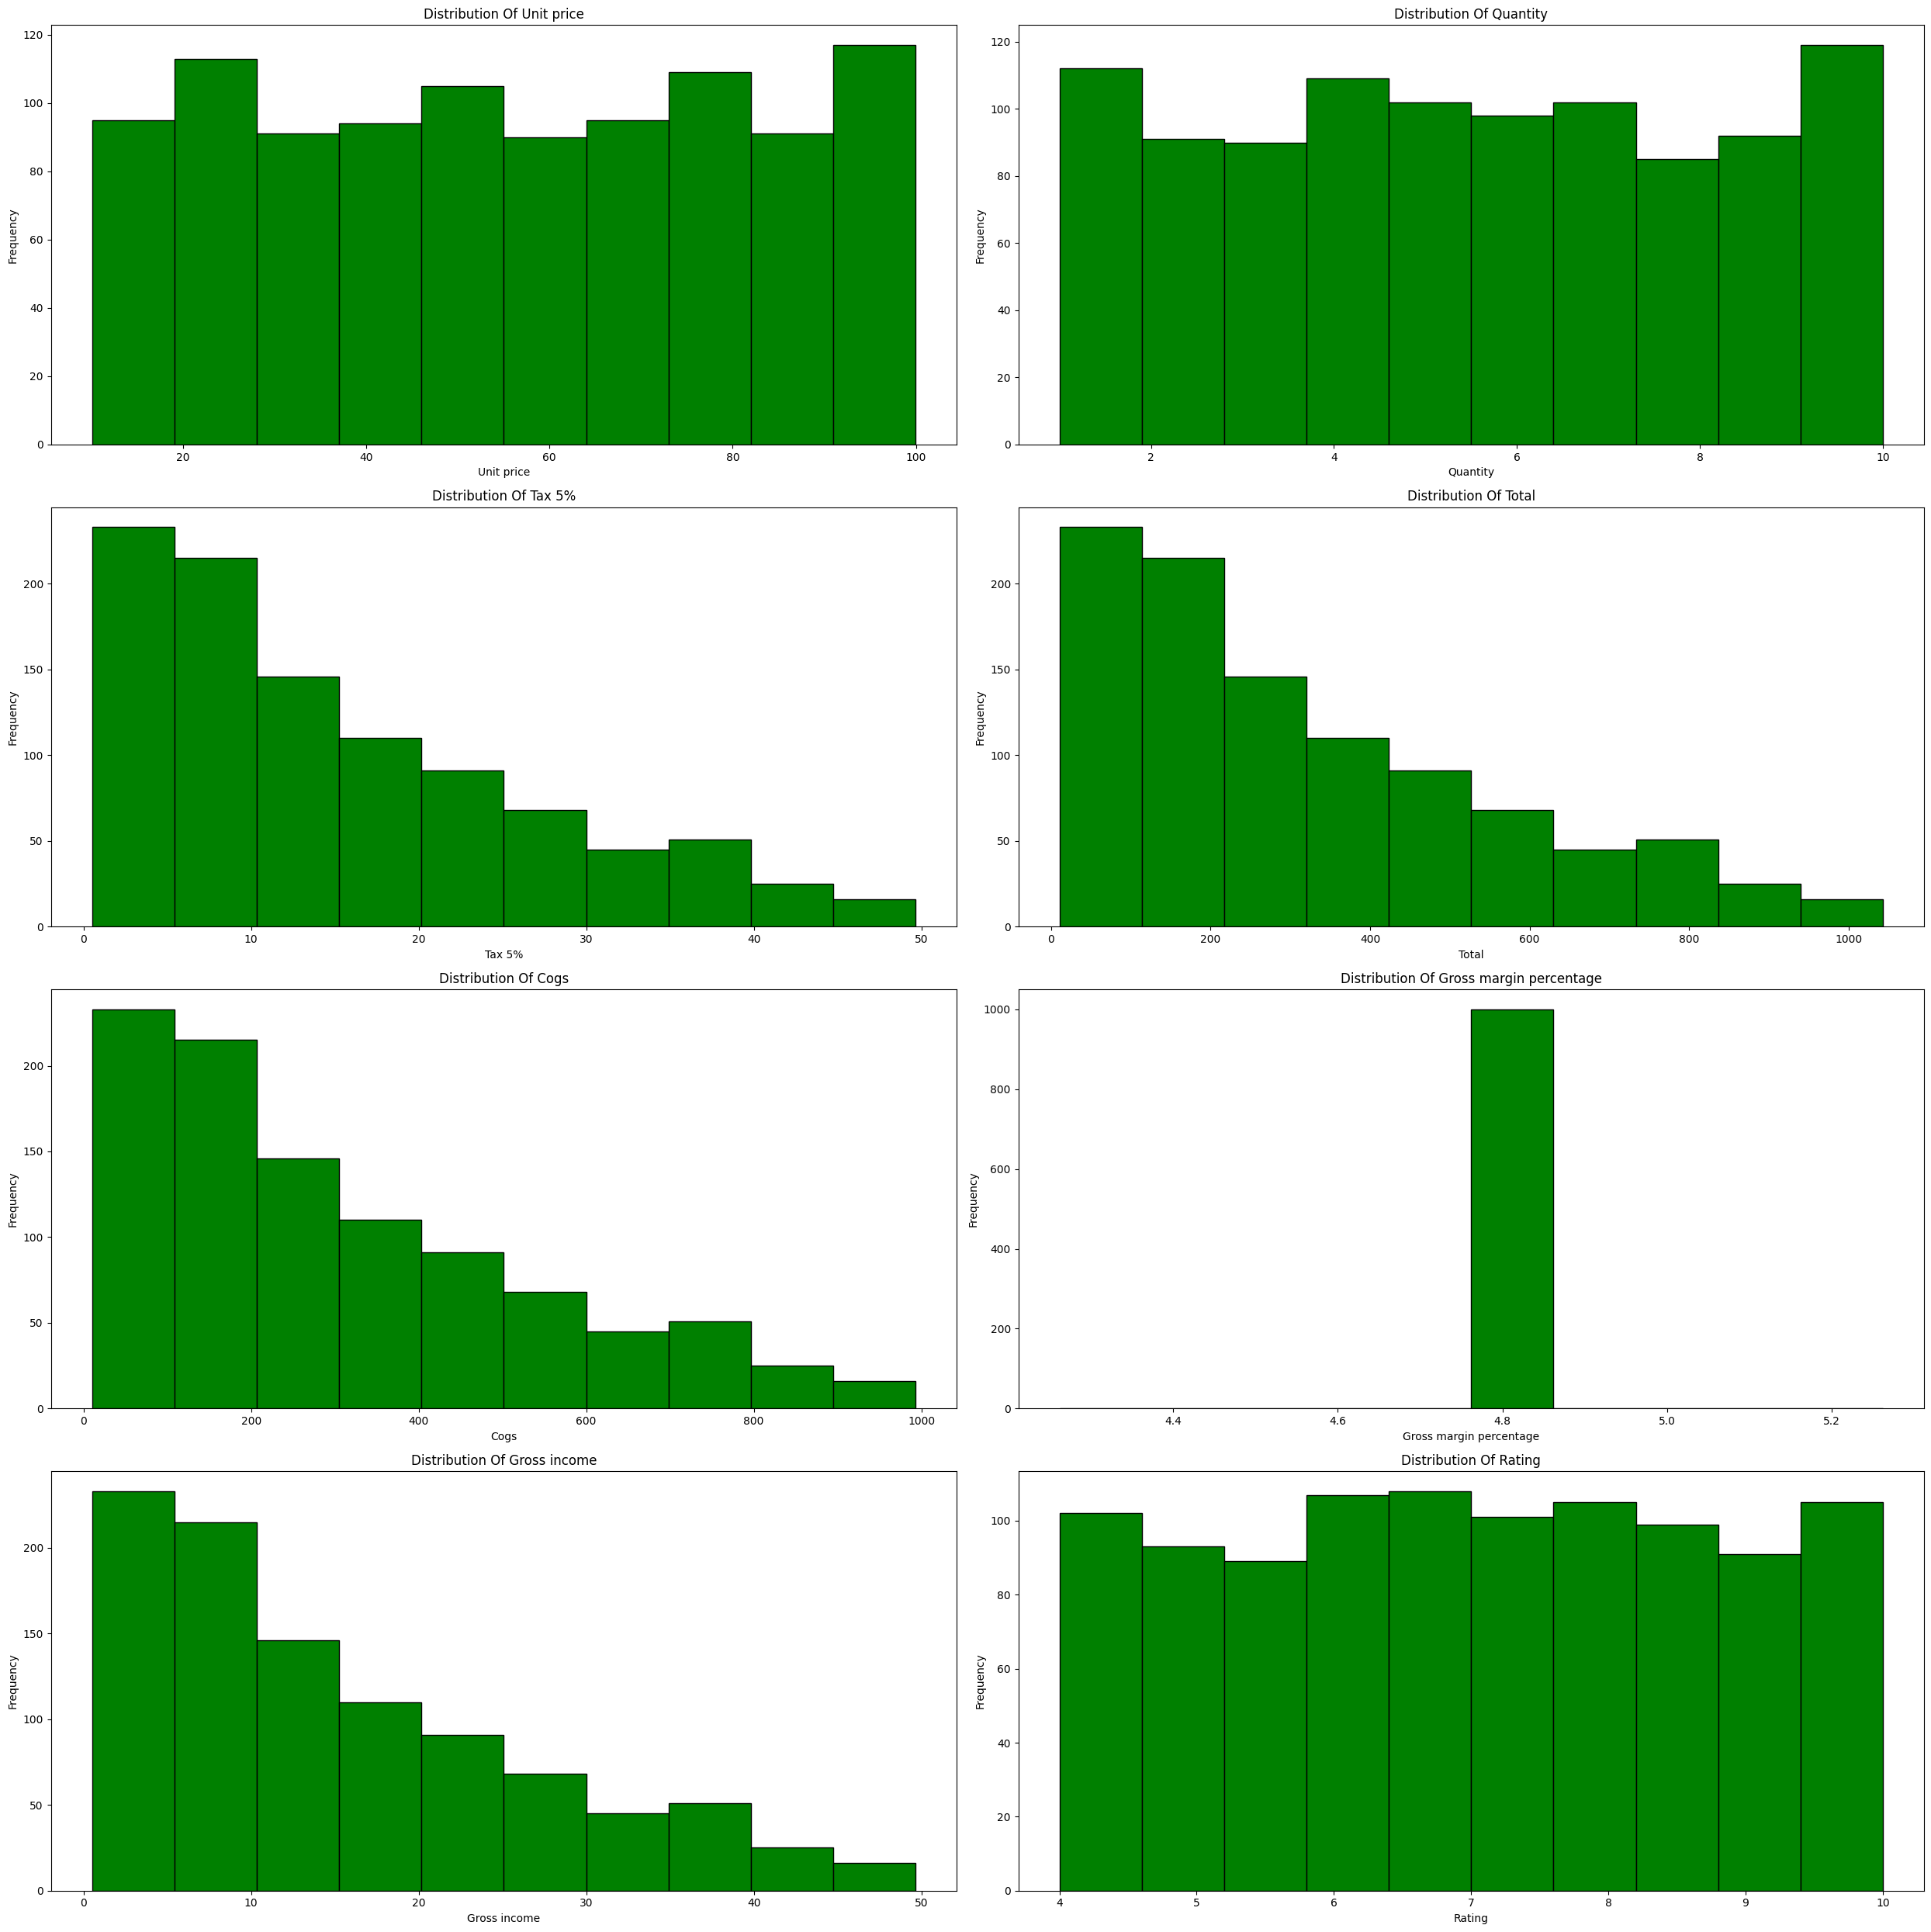

In [7]:
plt.figure(figsize=(25,25))

for index, col in enumerate(numerical_columns.columns):
    plt.subplot(4,2, (index+1))
    plt.hist(x=numerical_columns[col], edgecolor='black', color='green')
    plt.title(f"Distribution Of {(col.capitalize()).replace('_', ' ')}")
    plt.xlabel(f"{(col.capitalize()).replace('_', ' ')}")
    plt.ylabel('Frequency')
    plt.tight_layout()

**Third Way:**

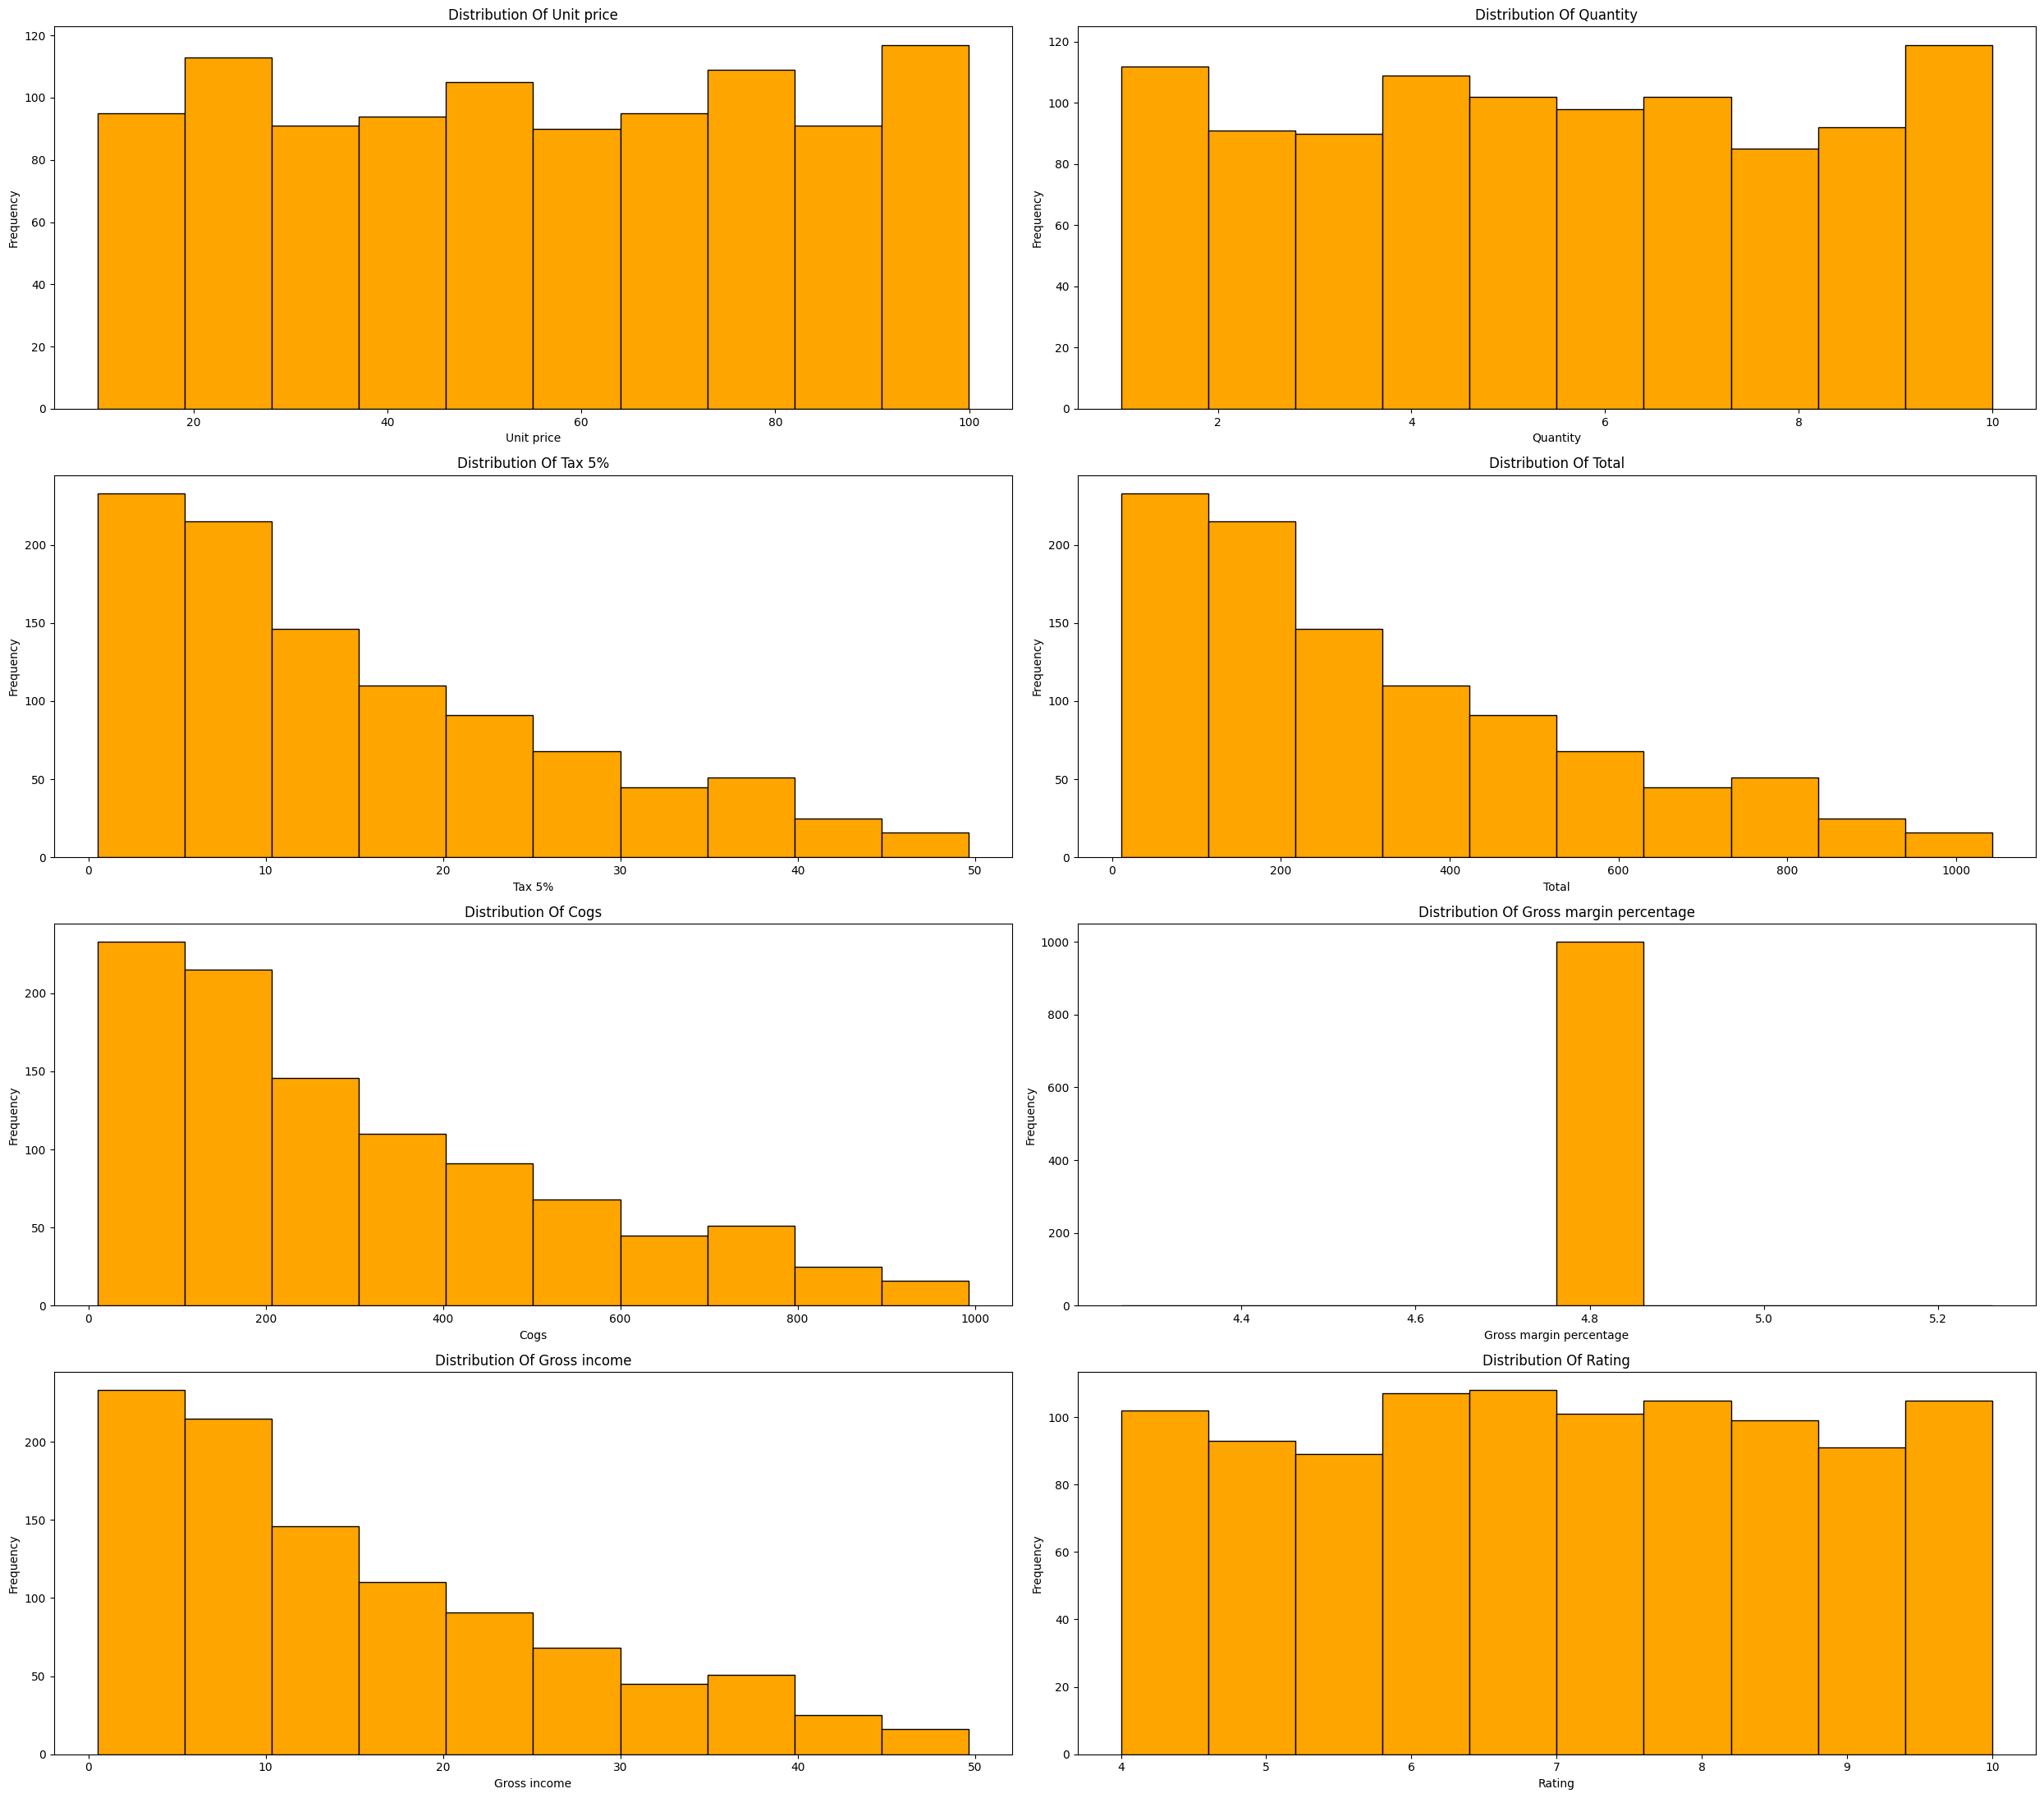

In [8]:
fig, ax = plt.subplots(4,2, figsize=(25,22))

for index, column in enumerate(numerical_columns.columns):
    row = index // 2
    col = index % 2
    ax[row,col].hist(x=numerical_columns[column], edgecolor='black', color='orange')
    ax[row, col].set_ylabel("Frequency")
    ax[row, col].set_xlabel(f"{(column.capitalize()).replace('_', ' ')}")
    ax[row,col].set_title(f"Distribution Of {(column.capitalize()).replace('_', ' ')}")
    plt.tight_layout()

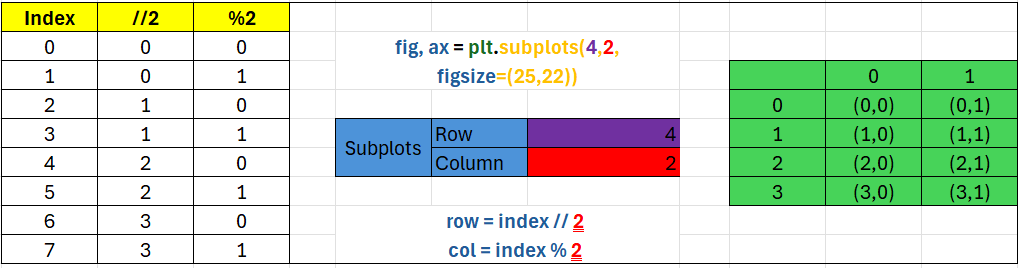

### **Using Seaborn Library:**

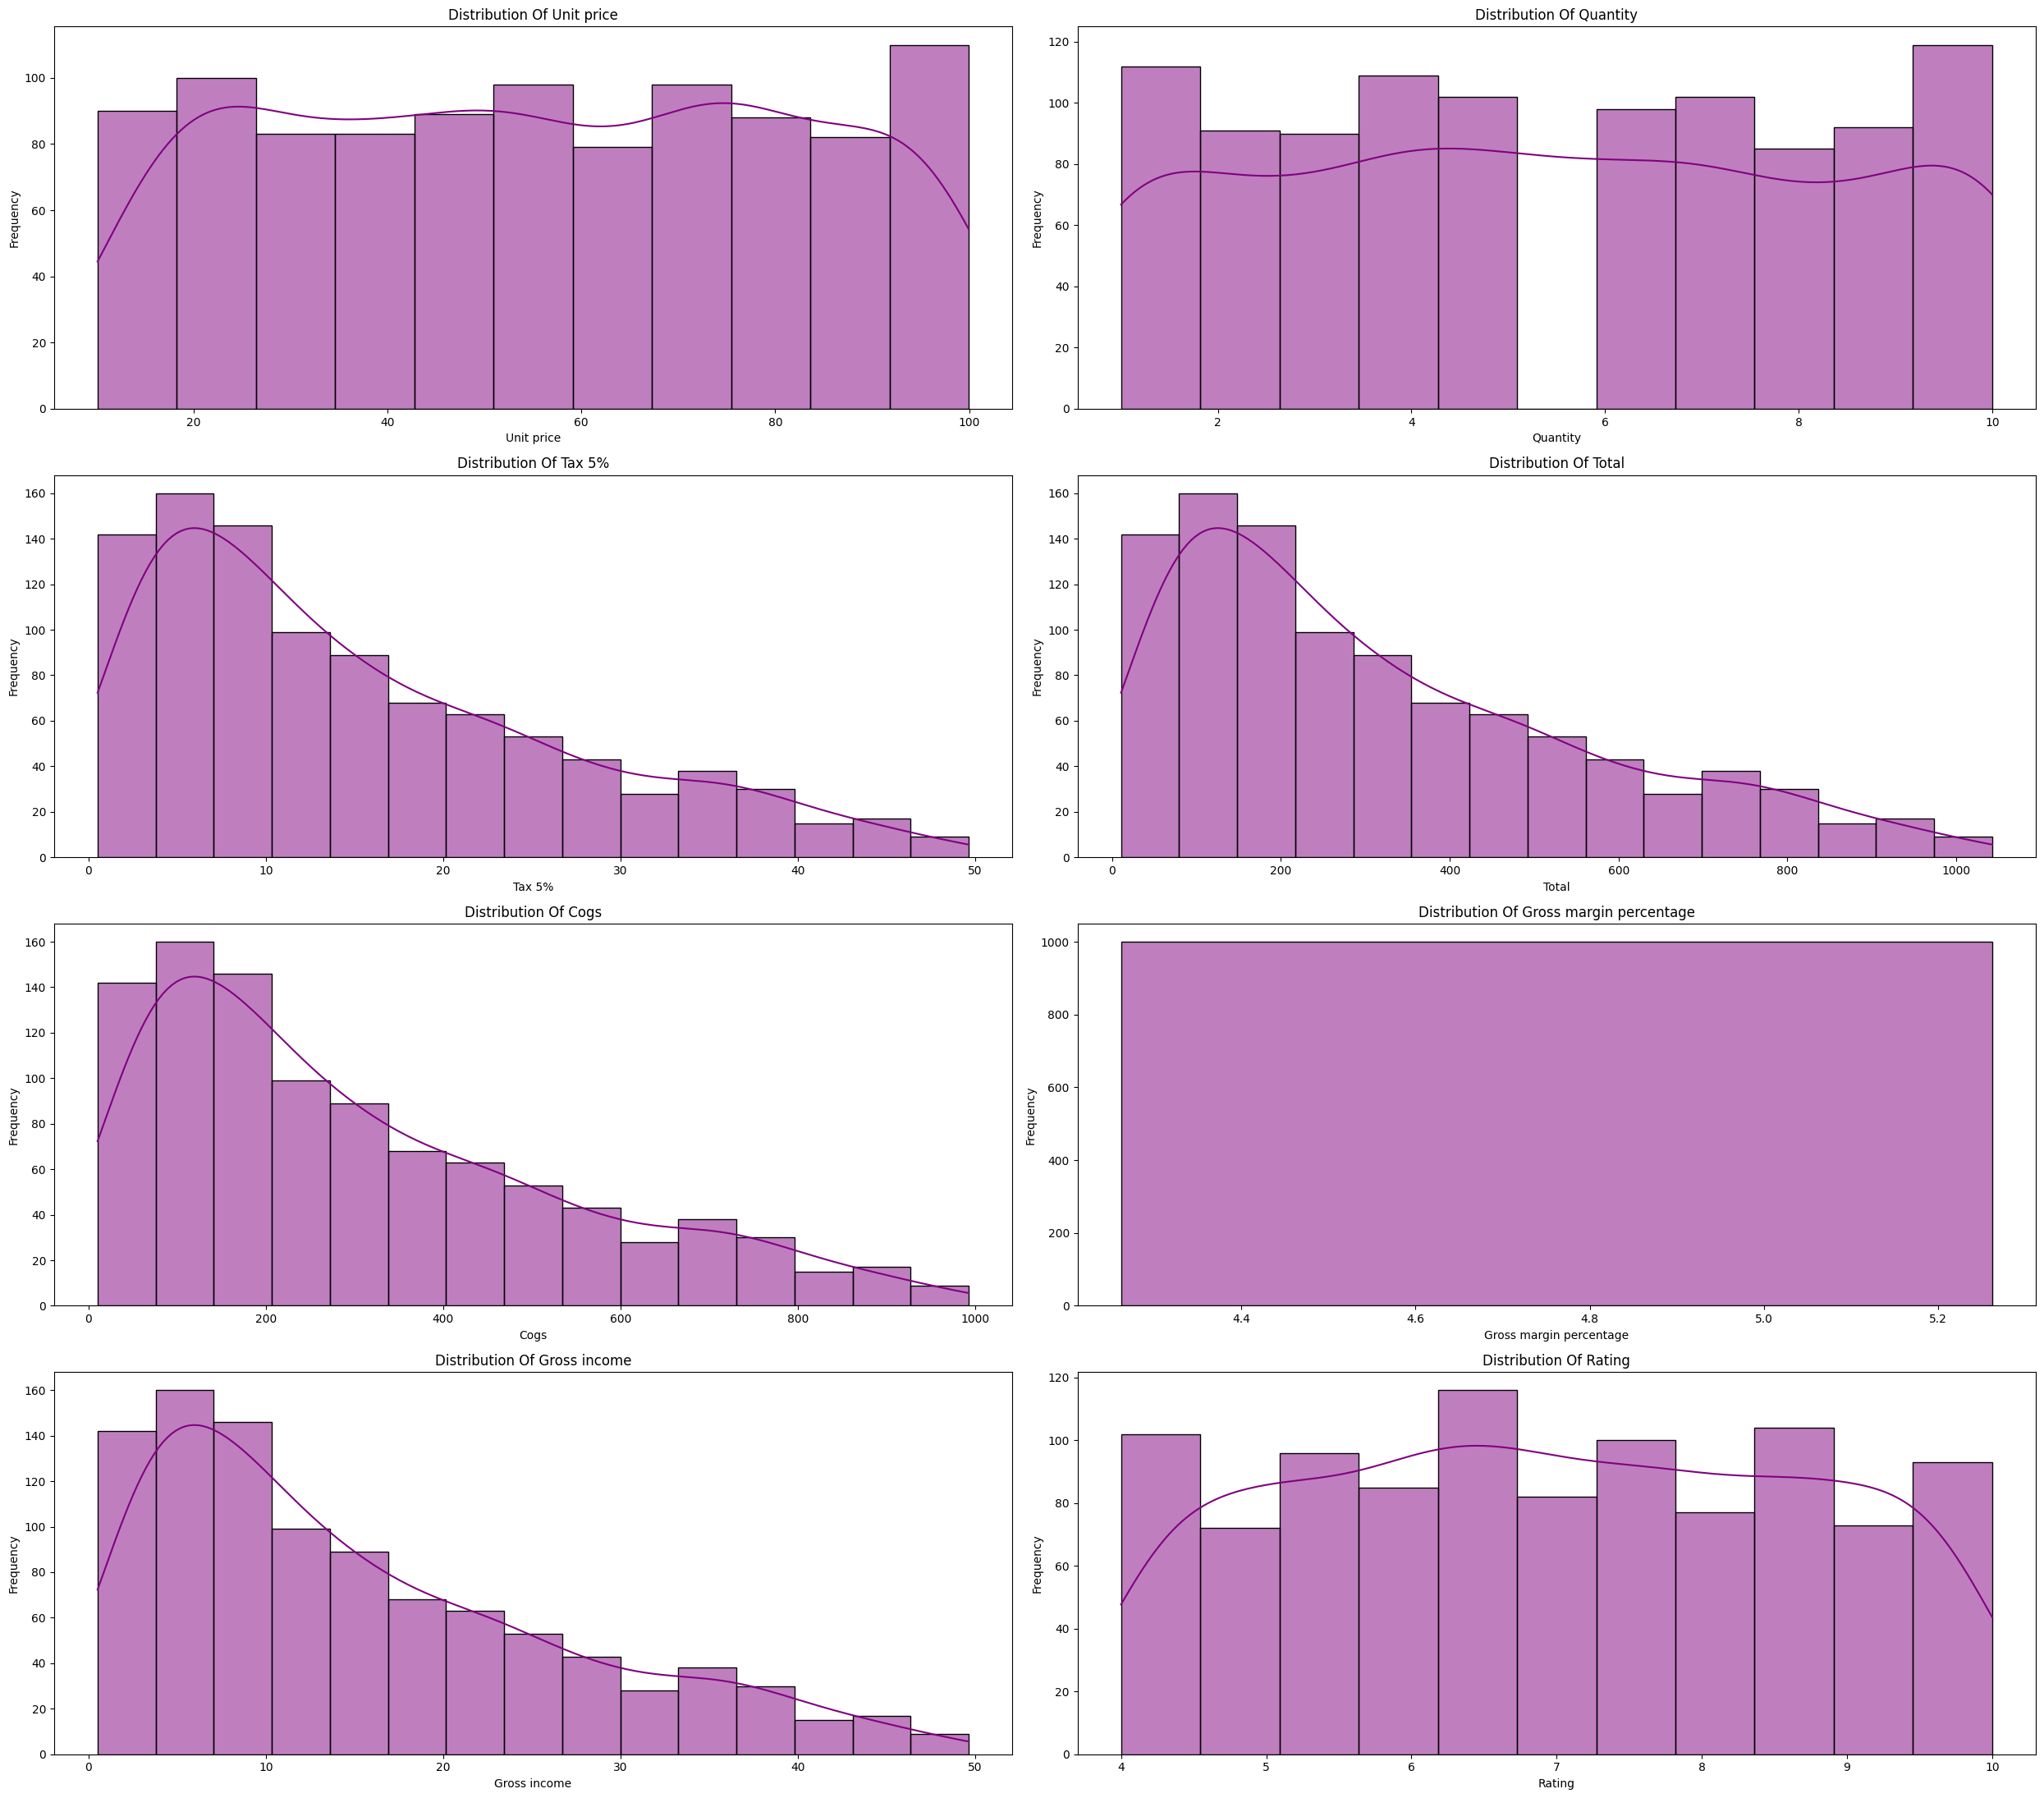

In [9]:
plt.figure(figsize=(25,22))

for index, col in enumerate(numerical_columns.columns):
    plt.subplot(4,2, (index +1))
    sns.histplot(numerical_columns[col], color='purple', kde=True, edgecolor='black')
    plt.title(f"Distribution Of {(col.capitalize()).replace('_', ' ')}")
    plt.xlabel(f"{(col.capitalize()).replace('_', ' ')}")
    plt.ylabel('Frequency')
    plt.tight_layout()

From the analysis of the `distribution` of the `numerical columns` of the data, we will focus on the shape distribution of this columns:

1. `Distribution Of Tax_5.`
2. `Distribution Of Total.`
3. `Distribution Of Cogs.`
4. `Distribution Of Gross Income.`


In [10]:
selected_numerical_columns = numerical_columns[["tax_5%", "total", "cogs", "gross_income"]]
selected_numerical_columns

,tax_5%,total,cogs,gross_income
0,26.1415,548.9715,522.83,26.1415
1,3.8200,80.2200,76.40,3.8200
2,16.2155,340.5255,324.31,16.2155
3,23.2880,489.0480,465.76,23.2880
4,30.2085,634.3785,604.17,30.2085
...,...,...,...,...
995,2.0175,42.3675,40.35,2.0175
996,48.6900,1022.4900,973.80,48.6900
997,1.5920,33.4320,31.84,1.5920
998,3.2910,69.1110,65.82,3.2910


**Distribution Of Main Numerical Columns (Histogram):**

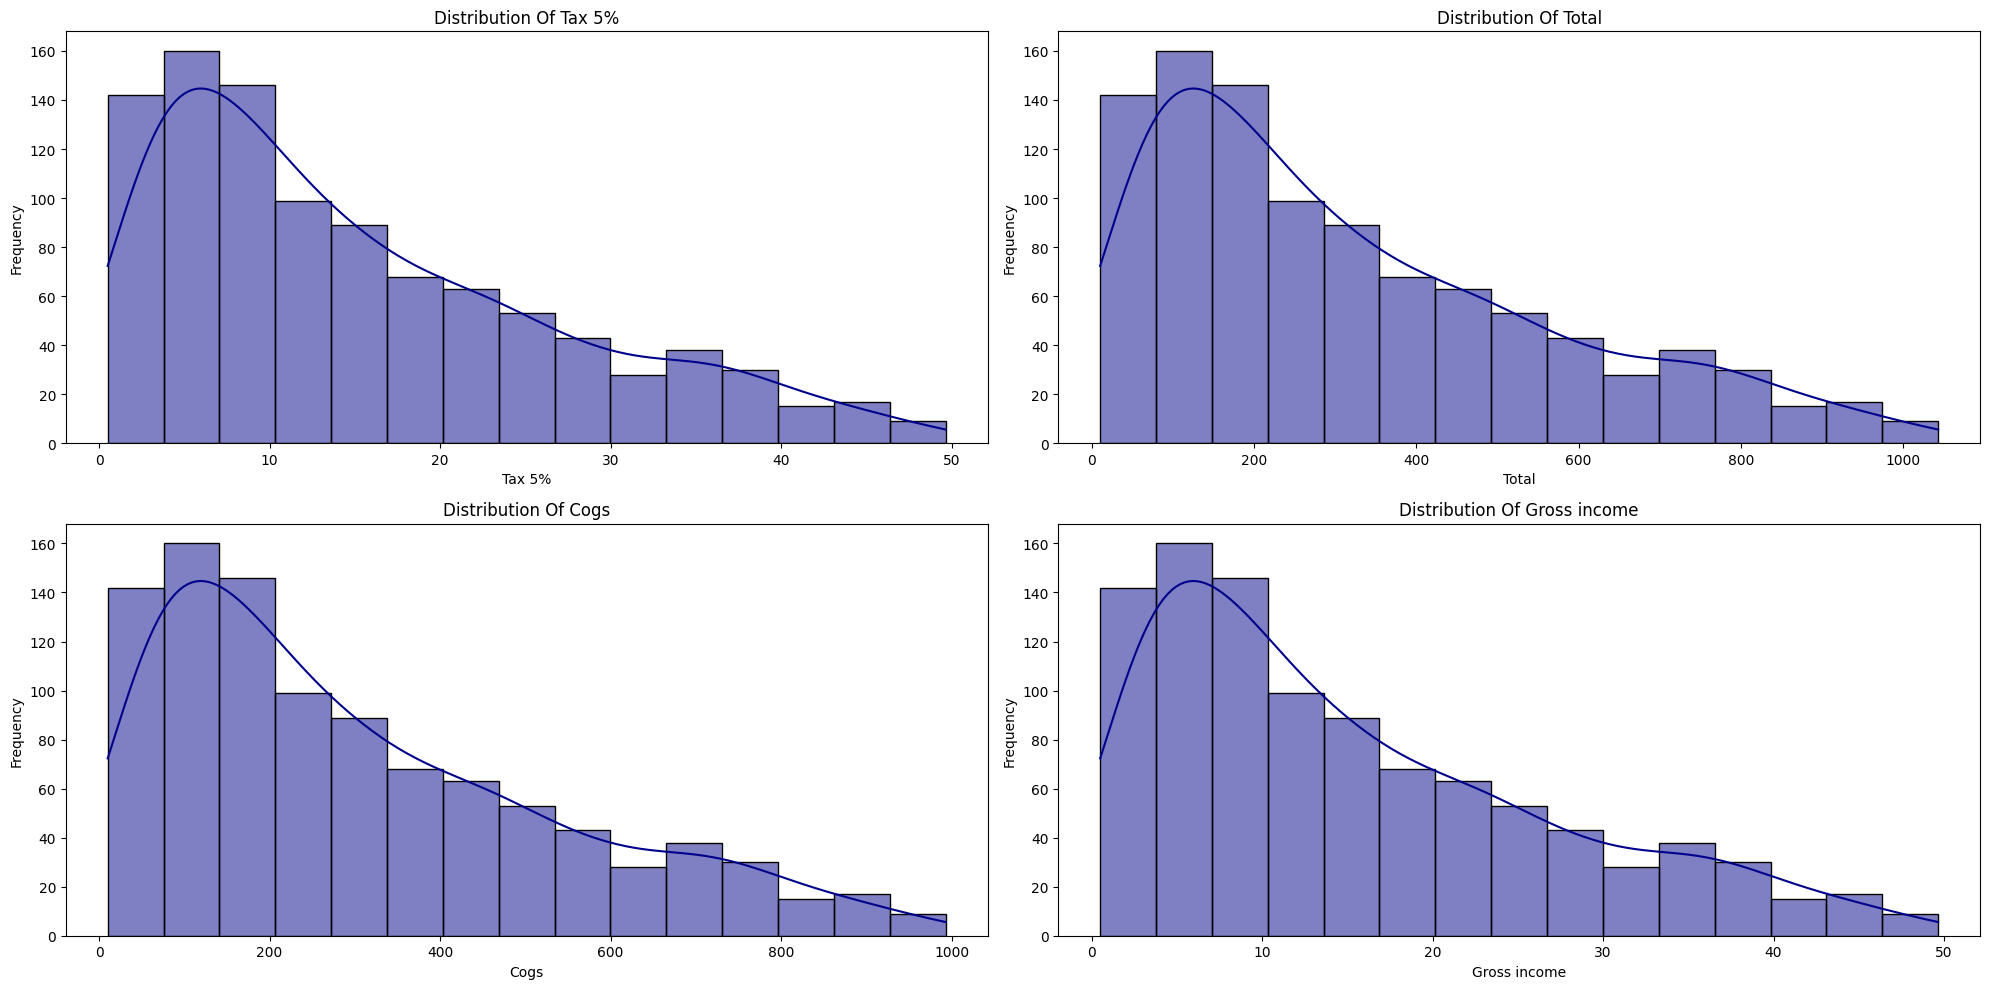

In [11]:
plt.figure(figsize=(20,10))

for index, col in enumerate(selected_numerical_columns.columns):
    plt.subplot(2,2, index+1)
    sns.histplot(
        selected_numerical_columns[col],
        color='darkblue',
        edgecolor="black",
        kde=True
    )
    plt.title(f"Distribution Of {(col.capitalize()).replace("_", " ")}")
    plt.xlabel(f"{(col.capitalize()).replace("_"," ")}")
    plt.ylabel("Frequency")
    plt.tight_layout()

**`Histograms Analysis:`**

- All four histograms show a right-skewed distribution, meaning there are a larger number of smaller values and fewer larger values, this indicates that the majority of the data points are concentrated towards the lower end of the range.

- We note that `Mean` > `Median`, so `Median` Is Suitable to Use Not `Mean`

**`Individual Histogram Analysis:`**

1. `Distribution of Tax_5:`

- The distribution is heavily concentrated between 0 and 20.
- There's a sharp decline in frequency beyond 20.
- This suggests that a large portion of the transactions have a tax rate below 20%.

2. `Distribution of Total:`

- The distribution is also right-skewed with a peak around 200.
- The frequency gradually decreases as the total amount increases.
- This indicates that most transactions have a total value below 200.

3. `Distribution of Cogs:`

- Similar to the other distributions, it's right-skewed with a peak around 200.
- The frequency tails off as the cost of goods sold increases.
- This suggests that a majority of the products have a cost of goods sold below 200.

4. `Distribution of Gross Income:`

- This distribution is also right-skewed with a peak around 10.
- The frequency decreases as the gross income increases.
- This indicates that most transactions have a gross income below 10.

**From the distribution of this selected `Quantitative` (`Numerical`) columns:**

1. All Columns Histogram (Shape Of The Curve) Are `Right-Skewed Curve` (`Positive Skewed`).
2. `Mean` > `Median`.
3. `Median` Is Suitable to Use Not `Mean`.
4. We Will Use `Box Plot` to Find Five Number Summary, And Identify The `Outliers`.


### **Describe Five Number Summary:**

**We used five number summary to find the `outliers` in our data, a `five-number summary` simply consists of the smallest data value (`Min`), the first quartile (`Q1`), the median (`Q2`), the third quartile (`Q3`), and the largest data value (`Max`).**
-	`Min`
-	`Q1`
-	`Median`
-	`Q3`
-	`Max`

In [12]:
numerical_columns.describe().round(2)

,unit_price,quantity,tax_5%,total,cogs,gross_margin_percentage,gross_income,rating
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,55.67,5.51,15.38,322.97,307.59,4.76,15.38,6.97
std,26.49,2.92,11.71,245.89,234.18,0.00,11.71,1.72
min,10.08,1.00,0.51,10.68,10.17,4.76,0.51,4.00
25%,32.88,3.00,5.92,124.42,118.50,4.76,5.92,5.50
50%,55.23,5.00,12.09,253.85,241.76,4.76,12.09,7.00
75%,77.94,8.00,22.45,471.35,448.90,4.76,22.45,8.50
max,99.96,10.00,49.65,1042.65,993.00,4.76,49.65,10.00


### **Box Plot Of Selected Quantitative (Numerical) Columns:**


**Using Seaborn Library:**

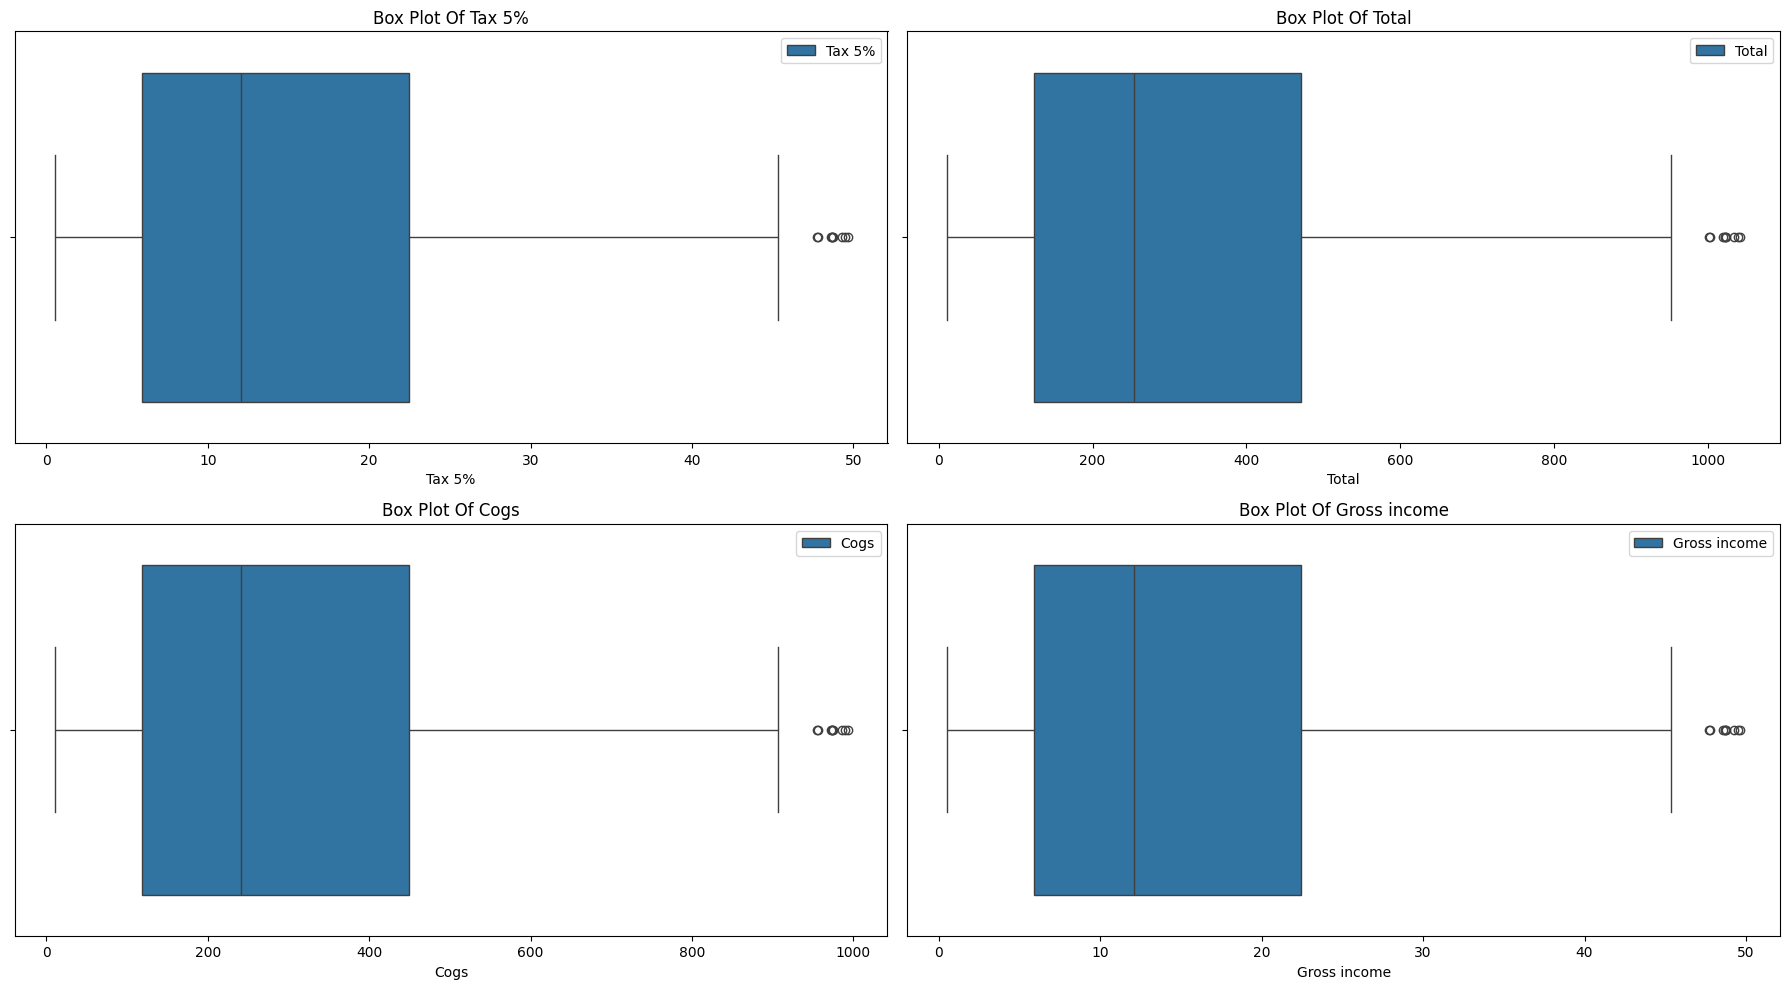

In [13]:
plt.figure(figsize=(18,10))

for index, col in enumerate(selected_numerical_columns.columns):
    plt.subplot(2,2, (index+1))
    sns.boxplot(
        x=selected_numerical_columns[col],
        label=((col.capitalize()).replace("_", " ")),
        vert=False
    )
    plt.title(f"Box Plot Of {(col.capitalize()).replace("_", " ")}")
    plt.xlabel((col.capitalize()).replace("_", " "))
    plt.tight_layout()

**Using Matplotlib Library:**

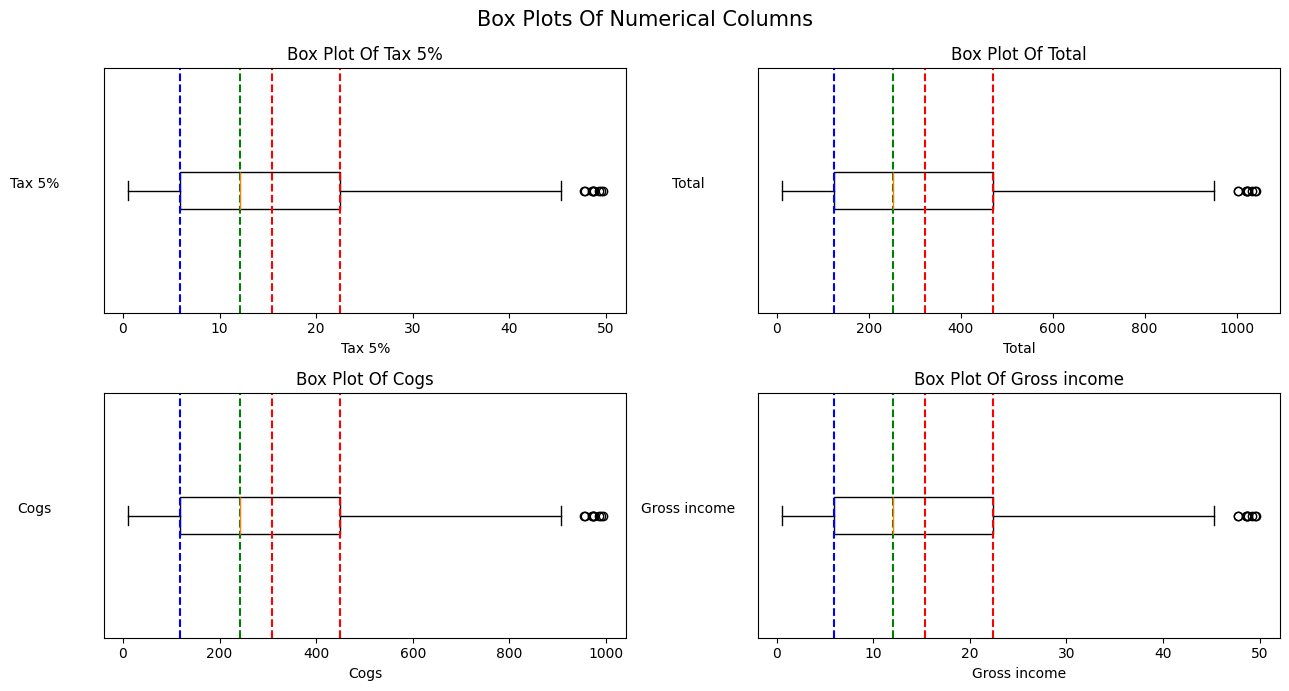

In [14]:
fig, ax = plt.subplots(2,2, figsize=(13,7))

for index, column in enumerate(selected_numerical_columns.columns):
    row = index // 2
    col = index % 2
    ax[row,col].boxplot(selected_numerical_columns[column], vert=False)
    ax[row,col].set_title(f"Box Plot Of {(column.capitalize()).replace("_", " ")}")
    ax[row,col].set_xlabel(f"{(column.capitalize()).replace("_", " ")}")
    ax[row,col].set_yticks([])
    ax[row,col].set_ylabel(f"{(column.capitalize()).replace("_", " ")}", rotation=0, labelpad=50)
    ax[row,col].axvline(x=(selected_numerical_columns[column].mean()), color='red', linestyle='--')
    ax[row,col].axvline(x=(selected_numerical_columns[column].median()), color='green', linestyle='--')
    ax[row,col].axvline(x=(selected_numerical_columns[column].quantile(0.25)), color='blue', linestyle='--')
    ax[row,col].axvline(x=(selected_numerical_columns[column].quantile(0.75)), color='red', linestyle='--')

    fig.suptitle("Box Plots Of Numerical Columns", fontsize=15)
    fig.tight_layout()

### **Univariate Analysis Of Categorical (Qualitative) Columns**

- In This Step We Will Focus On Important `Categorical` Columns:
    1. `branch`
    2. `city`
    3. `customer_type`
    4. `gender`
    5. `product_line`
    6. `payment`

### **(1) Analysis Of Branch Cateogrical Column:**

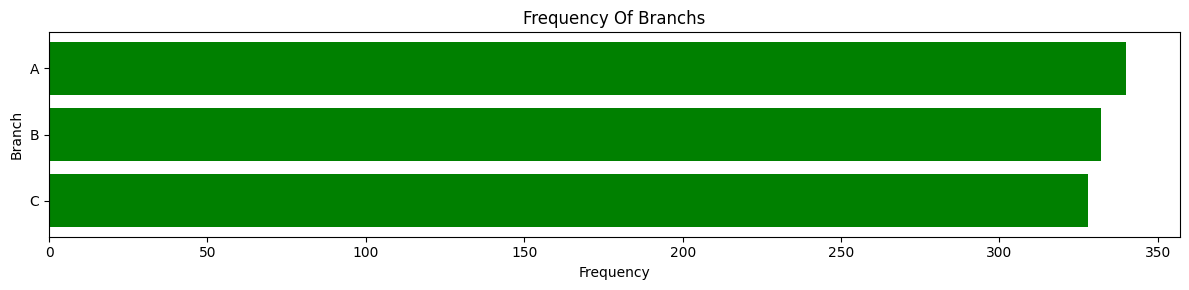

In [49]:
branch_frequency = df["branch"].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12,3))
plt.barh(branch_frequency.index, branch_frequency.values, color='green')
plt.title("Frequency Of Branchs")
plt.ylabel("Branch")
plt.xlabel("Frequency")
plt.gca().invert_yaxis()
plt.tight_layout()

**`Chart Analysis:`**

- The chart reveals an uneven distribution of activity across the three branches. Branch A appears to be the most active, followed by Branch B, and then Branch C. This suggests potential imbalances in workload, resources, or performance across the branches.

### **(2) Analysis Of City Cateogrical Column:**

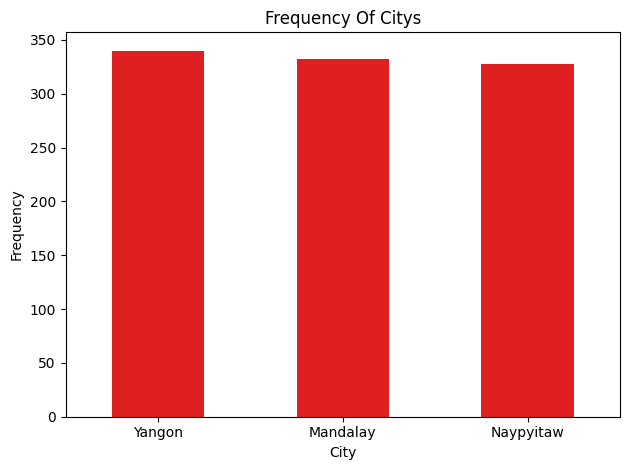

In [33]:
city_frequency = df["city"].value_counts().sort_values(ascending=False)

sns.barplot(city_frequency, color='red', width=0.5)
plt.title("Frequency Of Citys")
plt.xlabel("City")
plt.ylabel("Frequency")
plt.tight_layout()

In [34]:
city_frequency

city
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64

**`Chart Analysis:`**

- The chart shows a relatively even distribution of frequency across Yangon, Mandalay, and Naypyitaw. However, Yangon exhibits slightly higher activity compared to the other two cities. This suggests that while the overall distribution is balanced, there might be a slightly higher demand or activity in Yangon.


### **(3) Analysis Of Customer Type Cateogrical Column:**

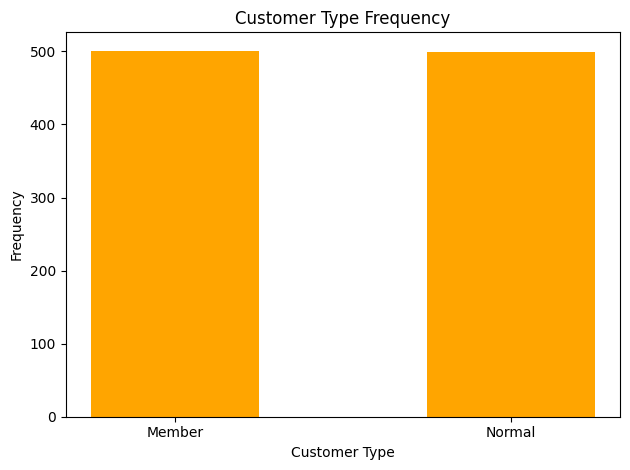

In [40]:
customer_type_fq = df["customer_type"].value_counts().sort_values(ascending=False)

plt.bar(customer_type_fq.index, customer_type_fq.values, color='orange', width=0.5)
plt.title("Customer Type Frequency")
plt.xlabel("Customer Type")
plt.ylabel("Frequency")
plt.tight_layout()

**`Chart Analysis:`**

- The chart shows a nearly equal distribution of frequencies between `Member` and `Normal` customers. This indicates a balanced customer base with a healthy mix of members and non-members. The slight edge towards `Normal` customers might suggest opportunities to further incentivize membership.

### **(4) Analysis Of Gender Type Cateogrical Column:**

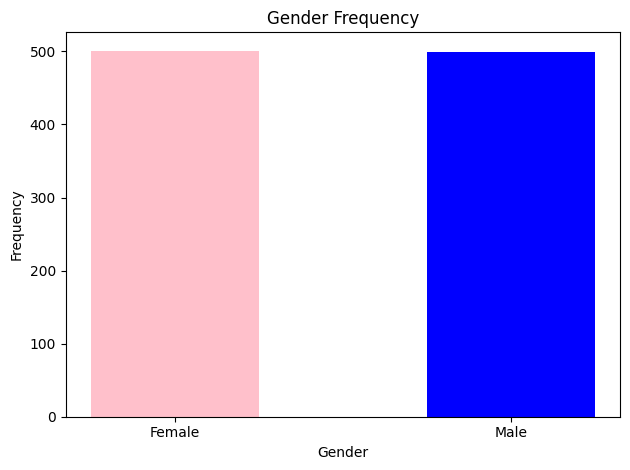

In [72]:
gender_frequency = df["gender"].value_counts().sort_values(ascending=False)

plt.bar(gender_frequency.index, gender_frequency.values, color=['pink', 'blue'], width=0.5)
plt.title("Gender Frequency")
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.tight_layout()

**`Chart Analysis:`**

- From this chart The frequency count for `females` is 501, while for `males` it is 499, indicating a slight discrepancy in the gender distribution.


### **(5) Analysis Of Product Line Cateogrical Column:**

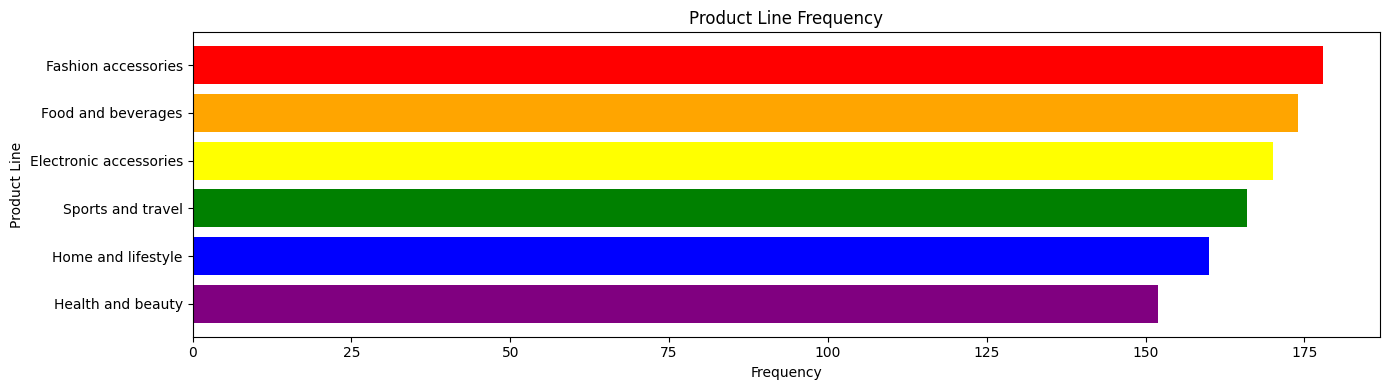

In [85]:
product_frequency = df["product_line"].value_counts().sort_values(ascending=False)

plt.figure(figsize=(14,4))
plt.barh(
    product_frequency.index,
    product_frequency.values,
    color=['red','orange','yellow','green','blue','purple']
    )
plt.title("Product Line Frequency")
plt.ylabel("Product Line")
plt.xlabel("Frequency")
plt.gca().invert_yaxis()
plt.tight_layout()

**`Chart Analysis:`**

- The bar chart visually represents the frequency of different product lines.

- `Fashion accessories`have the highest frequency, while health and beauty have the lowest.

- The distribution shows a descending pattern from fashion accessories to health and beauty.

- The chart effectively conveys the varying frequencies of each product line.

- The horizontal layout allows for easy comparison between the different categories.

- Overall, the chart effectively communicates the distribution of product line frequencies.

### **(6) Analysis Of Payment Cateogrical Column:**

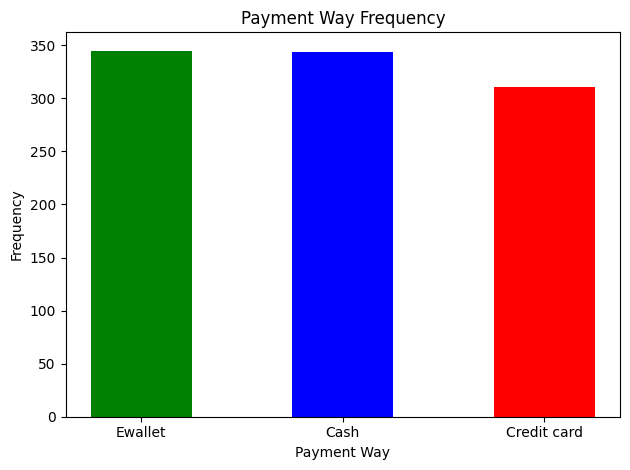

In [89]:
payment_frequency = df["payment"].value_counts().sort_values(ascending=False)

plt.bar(payment_frequency.index, payment_frequency.values, color=["green", "blue", "red"], width=0.5)
plt.title("Payment Way Frequency")
plt.xlabel("Payment Way")
plt.ylabel("Frequency")
plt.tight_layout()

**`Chart Analysis:`**

- `E-wallets` are the most popular payment method, followed closely by `cash`, but `credit card` usage is the least frequent. This suggests a preference for digital and convenient payment options among customers. The data can inform business decisions regarding payment infrastructure and marketing strategies to encourage credit card usage.